#01.SETUP

In [2]:
import os

In [3]:
cd /root/Share/LOTUSROOM/lotusroom_notebooks

/root/Share/LOTUSROOM/lotusroom_notebooks


In [4]:
!pip install transformers==4.25.1
!pip install bitsandbytes-cuda111==0.26.0
!pip install datasets==1.16.1
!pip install bitsandbytes loguru
!pip install accelerate
!pip install discord.py
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
!pip install transformers --upgrade
!pip install langdetect
!pip install scipy
!pip install tensorboard
!pip install ctranslate2 sentencepiece
!pip install -q diffusers transformers accelerate peft

DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not find a version that satisfies the requirement bitsandbytes-cuda111==0.26.0 (from versions: 0.26.0.post2)
ERROR: No matching distribution found for bitsandbytes-cuda111==0.26.0
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has 

In [5]:
import os
from config._tokens import *
os.environ['TOKEN1'] = token1
os.environ['TOKEN2'] = token2
os.environ['TOKEN3'] = token3

#02.LOAD GPTs & SD

In [6]:
from gptj import config, tokenizer, GPTJForCausalLM
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
#gpt = GPTJForCausalLM.from_pretrained("./saved_models_gpt-j-6B-8bit/gpt-j-6B",low_cpu_mem_usage=True)
gpt = GPTJForCausalLM.from_pretrained("/root/Share/LOTUSROOM/mary-shelly", revision="float16", torch_dtype=torch.float32, low_cpu_mem_usage=True)
gpt.to(device)


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


lm_head Linear(in_features=4096, out_features=50400, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, b

Some weights of the model checkpoint at /root/Share/LOTUSROOM/mary-shelly were not used when initializing GPTJForCausalLM: ['lm_head.adapter.0.weight', 'lm_head.adapter.1.weight', 'transformer.h.0.attn.k_proj.adapter.0.weight', 'transformer.h.0.attn.k_proj.adapter.1.weight', 'transformer.h.0.attn.out_proj.adapter.0.weight', 'transformer.h.0.attn.out_proj.adapter.1.weight', 'transformer.h.0.attn.q_proj.adapter.0.weight', 'transformer.h.0.attn.q_proj.adapter.1.weight', 'transformer.h.0.attn.v_proj.adapter.0.weight', 'transformer.h.0.attn.v_proj.adapter.1.weight', 'transformer.h.0.mlp.fc_in.adapter.0.weight', 'transformer.h.0.mlp.fc_in.adapter.1.weight', 'transformer.h.0.mlp.fc_out.adapter.0.weight', 'transformer.h.0.mlp.fc_out.adapter.1.weight', 'transformer.h.1.attn.k_proj.adapter.0.weight', 'transformer.h.1.attn.k_proj.adapter.1.weight', 'transformer.h.1.attn.out_proj.adapter.0.weight', 'transformer.h.1.attn.out_proj.adapter.1.weight', 'transformer.h.1.attn.q_proj.adapter.0.weight', 't

GPTJForCausalLM(
  (transformer): GPTJModel(
    (wte): FrozenBNBEmbedding(50400, 4096)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-27): 28 x GPTJBlock(
        (ln_1): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (attn): GPTJAttention(
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
          (k_proj): FrozenBNBLinear(4096, 4096)
          (v_proj): FrozenBNBLinear(4096, 4096)
          (q_proj): FrozenBNBLinear(4096, 4096)
          (out_proj): FrozenBNBLinear(4096, 4096)
        )
        (mlp): GPTJMLP(
          (fc_in): FrozenBNBLinear(4096, 16384)
          (fc_out): FrozenBNBLinear(16384, 4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): FrozenBNBLinear(4096, 50400)
)

In [7]:
async def get_mary_response(prompt, min_words=128, max_words=128):
    global device, tokenizer, gpt
    prompt = tokenizer(prompt, return_tensors='pt')
    prompt = {key: value.to(device) for key, value in prompt.items()}
    out = gpt.generate(**prompt, min_length=min_words, max_length=max_words, do_sample=True)
    return tokenizer.decode(out[0])

In [8]:
from diffusers import AutoPipelineForImage2Image

#pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda:1")
pipe.load_lora_weights("/root/Share/LOTUSROOM/LoRA/diaphanera.safetensors", adapter_name="diaphanera")
pipe.set_adapters(["diaphanera"], adapter_weights=[1.0])




Loading pipeline components...: 100%|████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.41it/s]


In [9]:
from PIL import Image
init_image = Image.open("/root/Share/LOTUSROOM/ref/HR_0266.jpg").resize((900,900))

negative_prompt = "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
seed=0
generator = torch.manual_seed(seed)


In [10]:
import random
prompt_list=['a piece of agate with a red and white pattern', 'a large piece of blue and white marble', 'a piece of agate with a blue and yellow pattern', 'a large piece of agate with a very large center', 'a piece of agate with a red and white stripe', 'a green and white stone with a black background', 'a large piece of pink and white rock', 'a piece of yellow agate with black spots', 'a piece of white and gold marble with a triangle', 'a piece of red and green agate', 'a large piece of agate with a diamond in the center', 'a large piece of red and black agate', 'a piece of rock with a hole in it', 'a white vase with a green center on a black surface', 'a green and yellow stone with a black background', 'a piece of agate with a black and white pattern', 'a piece of rock with a very large piece of rock in the middle', 'a piece of rock with a very colorful pattern', 'a piece of agate with a pattern of swirls', 'a piece of agate with a face on it', 'a large piece of art with a very colorful design', 'a piece of rock with a piece of rock in it', 'a piece of agate with a hole in it', 'a large piece of rock with a very large center', 'a piece of rock with a black and white pattern', 'a blue and white piece of rock with water inside', 'a piece of agate with a yellow and white swirl', 'a piece of rock with a white object in it', 'a picture of a lake with a sky in the background', 'a piece of agate with a black bird on it', 'a piece of agate with a pattern of swirls', 'a large piece of red and white rock with a black hole', 'a piece of rock with a very large piece of rock', 'a piece of red and white rock with a black background', 'a large piece of rock with a large crystal in it', 'a piece of agate with a red and white stripe', 'a slice of agate with a black background', 'a large piece of agate with a white and blue pattern', 'a slice of agate with a red and yellow stripe', 'a piece of rock with a cross on it', 'a slice of agate with a red center', 'a large piece of white and brown agate', 'a large slice of agate with a face on it', 'a piece of rock with a very large piece of material']
base_prompt = "((((diaphanera)))), ((("+ random.choice(prompt_list) +")))"
print (base_prompt)

((((diaphanera)))), (((a piece of agate with a black and white pattern)))


In [11]:
def generate_sd(prompt):
    with torch.no_grad():  # 勾配計算を無効化
        base_prompt = f"diaphanera, {random.choice(prompt_list)}"
        print (base_prompt+prompt)
        image = pipe(
            prompt=f"{base_prompt}, (({prompt}))",
            width=1024,
            height=1024,
            image=init_image,
            negative_prompt=negative_prompt,
            generator=generator,
            strength=0.75,
            guidance_scale=7.0,
            num_inference_steps=25).images[0]
    return image

diaphanera, a piece of red and green agate


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.74it/s]


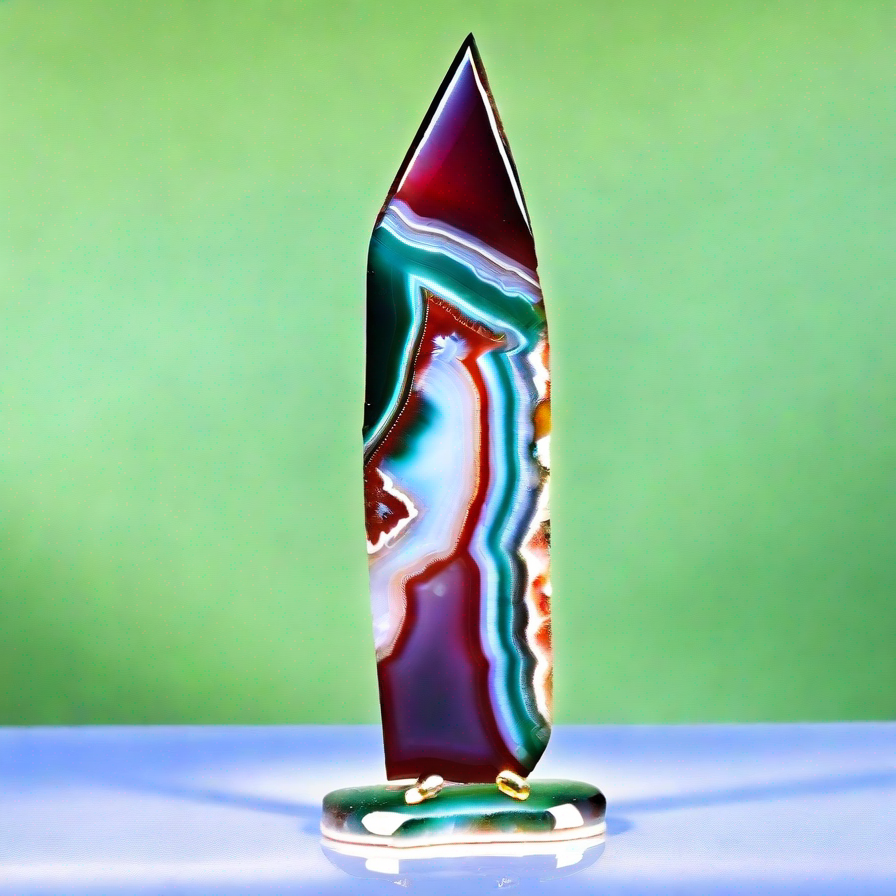

In [12]:
prompt=''
generate_sd(prompt)

In [13]:
#!pip install openai --upgrade
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install openai==0.28

# 2. APIキーを設定
import openai
import os

from config._api_key import openai_api
openai.api_key = openai_api
os.environ['OPENAI_API'] = openai_api

async def get_gpt4_response(prompt, model="gpt-4-0125-preview", tokens=1000):
    response = await openai.ChatCompletion.acreate(
        model=model,
        messages=[
            {"role": "system", "content": "You are a brilliant fashion design assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=tokens,
        temperature=0.7,
    )
    return response




DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
prompt='eureka'
await get_mary_response(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'eureka.instance.hostName" value="#settings.eureka.instance.url"/>\n        </entry>\n        <entry key="eureka.instance.nonCoreServicesPort">\n            <value>8091</value>\n        </entry>\n        <entry key="eureka.instance.statusPagePath">\n            <value>/actuator/'

In [15]:
await get_gpt4_response(prompt)

<OpenAIObject chat.completion id=chatcmpl-8tVxPv16cuQPDg2yzDZi8zpMQqhWl at 0x7f262ba47d30> JSON: {
  "id": "chatcmpl-8tVxPv16cuQPDg2yzDZi8zpMQqhWl",
  "object": "chat.completion",
  "created": 1708241575,
  "model": "gpt-4-0125-preview",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "It sounds like you've had a moment of inspiration or a breakthrough idea! That's fantastic. How can I assist you in bringing your \"Eureka\" moment to life in the world of fashion design? Whether it's brainstorming, refining your idea, or figuring out the practical steps to turn your concept into a tangible design, I'm here to help. Let me know more about your vision!"
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 21,
    "completion_tokens": 80,
    "total_tokens": 101
  },
  "system_fingerprint": "fp_aba334f399"
}

# 03.LOAD LOTUS

In [19]:
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('discord')
logger.setLevel(logging.DEBUG)
handler = logging.FileHandler(filename='discord.log', encoding='utf-8', mode='w')
handler.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s:%(name)s: %(message)s'))
logger.addHandler(handler)

In [16]:
from config.prompts import *

In [24]:
import discord
import os
import openai
import asyncio
import re
from datetime import datetime
import shutil
from asyncio import sleep

from langdetect import detect as lang_detect

BG_EXT = ".gif"
BG_GIF_PATH = f'/root/Share/LOTUSROOM/GDrive/3dlogo_typ_bg{BG_EXT}'

#initial
intents = discord.Intents.default()
intents.message_content = True
client_gpt = discord.Client(intents=intents)
client_mary = discord.Client(intents=intents)
client_anagami = discord.Client(intents=intents)

token_mary = os.environ['TOKEN2']
token_gpt = os.environ['TOKEN1']
token_anagami = os.environ['TOKEN3']
openai.api_key = os.environ['OPENAI_API']

client_gpt_id = None
client_mary_id = None
client_anagami_id = None
user_who_typed_mary_id = None

dialogue_log = ""
question = ""
loop_value = 1

min_words_mary = 150
max_words_mary = 250

last_mary_message_time = None
question_list = []

from config._discord import *

async def check_last_message_time():
    global last_mary_message_time
    while True:
        if last_mary_message_time:
            time_since_last_message = datetime.now() - last_mary_message_time
            if time_since_last_message.total_seconds() >= 300:  # 300 seconds = 5 minutes
                channel = discord.utils.get(client_anagami.get_all_channels(), name='your-channel-name')
                if channel:
                    await channel.send("調子はどう？")
                last_mary_message_time = None  # Reset the timer
        await asyncio.sleep(60)  # Check every minute


async def move_old_images(destination_folder, log_folder, keep_files_count=5):
    """
    Move all files except the latest 'keep_files_count' from the destination folder to the log folder.
    """
    os.makedirs(log_folder, exist_ok=True)

    files = [f for f in os.listdir(destination_folder) if os.path.isfile(os.path.join(destination_folder, f))]
    files.sort(key=lambda x: os.path.getmtime(os.path.join(destination_folder, x)), reverse=True)  # sort files by modification time

    for file in files[keep_files_count:]:  # Skip the latest 'keep_files_count' files
        old_path = os.path.join(destination_folder, file)
        new_path = os.path.join(log_folder, file)
        shutil.move(old_path, new_path)

async def save_gif(destination_folder, filename):
    """
    Save a gif file to the destination folder and then move old images to the log folder.
    """
    destination_path = f"{destination_folder}/{filename}{BG_EXT}"
    #shutil.copy2(BG_GIF_PATH, destination_path)
    current_time = datetime.now().timestamp()
    os.utime(destination_path, (current_time, current_time))

    base_directory = os.path.dirname(os.path.dirname(destination_folder))
    log_folder = os.path.join(base_directory, 'logs', os.path.basename(destination_folder))
    await move_old_images(destination_folder, log_folder, keep_files_count=5)


def response_editor(response):
  if "。" in response:
      response = response.rsplit("。", 1)[0] + "。"
  elif "." in response:
      response = response.rsplit(".", 1)[0] + "."
  elif "\n" in response:
      response = response.rsplit("\n", 1)[0]
  return response

def extract_text(pattern, text):
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return ""

@client_mary.event
async def on_ready():
  global client_mary_id
  print(f'Welcome {client_mary.user}')
  client_mary_id = client_mary.user.id

async def on_reset(message, dialogue_log, question):
    dialogue_log = ""
    question = ""
    # channel = client_mary.get_channel(message.channel.id)
    # await channel.send("（reset dialogue）")
    # channel = client_gpt.get_channel(message.channel.id)
    # await channel.send("（reset dialogue）")
    return dialogue_log, question

@client_mary.event
async def on_message(message):
  global dialogue_log, loop_value, question, question_list, last_mary_message_time
  #print(message.author.name)

  #print (state_machine.is_waiting_for_mary(), message.content)
  if message.content.startswith("/reset"):
    dialogue_log, question = await on_reset(message, dialogue_log, question)

  #if message.content.startswith("/mary"):
  #if str(message.channel.id) == specific_channel_id:
  if (str(message.channel.id) in specific_channel_ids) and ((message.author.name in specific_user_names) or (message.author.id in specific_user_ids)):
    last_mary_message_time = datetime.now()
    user_who_typed_mary_id = message.author.id
    user_who_typed_mary_name = message.author.name
    dialogue_log, question = await on_reset(message, dialogue_log, question)
    loop_value = 10
    text = message.content.lstrip()
    dialogue_log += f'{user_who_typed_mary_name}: {text}\n'

    text_lang = lang_detect(text)
    await on_generate(text, message, text_lang, loop_value)

    while loop_value >1:
      await on_generate(question, message, text_lang, loop_value-1)
      loop_value -=1
    dialogue_log, question = await on_reset(message, dialogue_log, question)

    await sleep(180)

    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")

    #paths = [f"/content/drive/MyDrive/HATRA24SS/raspi/pi{str(i).zfill(2)}" for i in range(1, 9)]
    paths = [f"/root/Share/LOTUSROOM/GDrive/AX01/01/"]
    for path in paths:
        await save_gif(path, f"generated_image_{date_time}")

    dialogue_log, question = await on_reset(message, dialogue_log, question)

async def on_sd(prompt, str_idx):
    image = generate_sd(prompt)
    save_path = f'/root/Share/LOTUSROOM/GDrive/AX01/{str_idx}/'
    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")
    file_path = f"{save_path}generated_image_{date_time}.png"
    image.save(f"{file_path}")
    print(f"{file_path}")
    base_directory = os.path.dirname(os.path.dirname(save_path))
    log_folder = os.path.join(base_directory, 'logs', os.path.basename(save_path))
    await move_old_images(save_path, log_folder)
    return file_path

@client_mary.event
async def on_generate(prompt, message, text_lang='ja', loop_value=None):
    lang_idx = 0 if text_lang == 'ja' else 1
    global dialogue_log, question, question_list
    #print (loop_value)
    
    channel = client_mary.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")
    mary_raw_response = await get_mary_response(prompt, min_words_mary, max_words_mary)
    mary_response = response_editor(mary_raw_response[len(prompt):])

    dialogue_log += f'Mary: {mary_response}\n'

    await thinking_msg.delete()  # Delete the thinking message instead of the user's message
    if mary_response.strip():  # mary_responseが空白でない場合
        await message.channel.send(mary_response)
    else:
        # mary_responseが空の場合、代わりの文字列を送信
        await message.channel.send("???????")
    #await message.channel.send(mary_response)

    await client_gpt.wait_until_ready()
    channel = client_gpt.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")

    text = f'{GPTPROMPT_A[lang_idx]}\n{ATTENTION_MSG[lang_idx]}\nMary:{mary_response}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    interpretation = extract_text(fr"{A_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    preview_interpolation = f"```{interpretation}```"
    try:
      await thinking_msg.delete()
    except discord.errors.NotFound:
      print("The message was already deleted or not found.")
    await channel.send(preview_interpolation)

    generating_msg = await channel.send(f"（generating...）")
    #thinking_msg = await channel.send(f"（thinking...）")
    text = f'{GPTPROMPT_B[lang_idx]}\n{interpretation}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    prompt_proposal = extract_text(fr"{B_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    # preview_prompt = f"```{prompt_proposal}```"
    # try:
    #   await thinking_msg.delete()
    # except discord.errors.NotFound:
    #   print("The message was already deleted or not found.")
    # await channel.send(preview_prompt)

    
    #file_path = await on_sd(prompt_proposal, '01')
    file_path = await on_sd(prompt_proposal, '01') #2023/11/14test
    print(file_path)
    with open(file_path, 'rb') as f:
        await channel.send(file=discord.File(f))
    try:
      await generating_msg.delete()
    except discord.errors.NotFound:
            print("The message was already deleted or not found.")

    if loop_value > 1:
        thinking_msg = await channel.send(f"（thinking...）")
        text = f'{GPTPROMPT_C[lang_idx]}\n{interpretation}'
        response = await get_gpt4_response(text)
        gpt_response= response['choices'][0]['message']['content']
        question = extract_text(fr"{C_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
        question_list.append(question)
        try:
          await thinking_msg.delete()
        except discord.errors.NotFound:
          print("The message was already deleted or not found.")
        await channel.send(question)
    else:
        for i in range(2,8):
          _ = await on_sd(prompt_proposal, str(i).zfill(2))
        

    dialogue_log += f'GPT4: {question}\n'

@client_gpt.event
async def on_ready():
  global client_gpt_id
  print(f'Welcome {client_gpt.user}')
  client_gpt_id = client_gpt.user.id

@client_anagami.event
async def on_ready():
  global client_anagami_id
  print(f'Welcome {client_anagami.user}')
  client_anagami_id = client_anagami.user.id

async def main():
    # Start the Discord clients
    client_tasks = asyncio.gather(
        client_mary.start(token_mary),
        client_gpt.start(token_gpt),
        client_anagami.start(token_anagami)
    )
    # Start the timer task
    timer_task = asyncio.create_task(check_last_message_time())
    # Wait for all tasks to complete
    await asyncio.gather(client_tasks, timer_task)


DEBUG:discord.client:on_ready has successfully been registered as an event
DEBUG:discord.client:on_message has successfully been registered as an event
DEBUG:discord.client:on_generate has successfully been registered as an event
DEBUG:discord.client:on_ready has successfully been registered as an event
DEBUG:discord.client:on_ready has successfully been registered as an event


In [ ]:
await main()

INFO:discord.client:logging in using static token
INFO:discord.client:logging in using static token
INFO:discord.client:logging in using static token
DEBUG:discord.http:GET https://discord.com/api/v10/users/@me with None has returned 200
DEBUG:discord.http:GET /users/@me has found its initial rate limit bucket hash (78bb8553d9352a5a2f89f9def401287a).
DEBUG:discord.http:GET https://discord.com/api/v10/users/@me has received {'id': '1159704022261977110', 'username': 'MaryGPT', 'avatar': '8b8cb7d7de01e245a32b9bfd93a1dadb', 'discriminator': '9745', 'public_flags': 0, 'premium_type': 0, 'flags': 0, 'bot': True, 'banner': None, 'accent_color': None, 'global_name': None, 'avatar_decoration_data': None, 'banner_color': None, 'mfa_enabled': False, 'locale': 'en-US', 'email': None, 'verified': True, 'bio': ''}
DEBUG:discord.http:GET https://discord.com/api/v10/users/@me with None has returned 200
DEBUG:discord.http:GET /users/@me has found its initial rate limit bucket hash (78bb8553d9352a5a2f89

Welcome MaryGPT#9745
Welcome GPT4#8550
Welcome nagami(auto)#7615


DEBUG:discord.gateway:Keeping shard ID None websocket alive with sequence 3.
DEBUG:discord.gateway:Keeping shard ID None websocket alive with sequence 3.
DEBUG:discord.gateway:Keeping shard ID None websocket alive with sequence 3.
DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': None, 's': None, 'op': 11, 'd': None}
DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': None, 's': None, 'op': 11, 'd': None}
DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': None, 's': None, 'op': 11, 'd': None}
DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 4, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T07:57:58.547000+00:00', 'referenced_message': None, 'pinned': False, 'nonce': '1208683817326346240', 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': [], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-01-12T03:22:35.286000+00:00', 

diaphanera, a piece of rock with a cross on itEthereal landscapes, whispering silks, juxtaposition of ancient wisdom and futuristic visions, personas emerging from a tapestry of dreams, clad in fabrics that defy the conventional, amalgamating tradition and innovation, embodying the essence of transcending boundaries through fashion.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_165858.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_165858.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 12, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T07:58:59.350000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208684073346670672', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/1208684073

diaphanera, a piece of red and green agateEthereal silhouettes, whispering fabrics, shadowed hues, interwoven destinies, minimalist elegance, unspoken bonds, evolving identities, serene introspection, tactile whispers, muted opulence, delicate interplay, nuanced relationships, transformative journeys, introspective landscapes, subtle revelations, gentle growth, sartorial whispers, tranquil connections, poetic garments, understated complexity


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_165956.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_165956.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 25, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T07:59:56.934000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208684314871463967', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/1208684314

diaphanera, a piece of agate with a black and white patternEthereal elegance, fluidity, delicate textures, viscous materials, transformative silhouettes, subtle hues, dynamic displays, innovative exhibition methods, light manipulation, motion-inspired presentations, tactile sensations, fabric metamorphosis, nuanced design, sophisticated ambiance, sensory engagement, wearable artistry


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170054.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170054.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 38, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T08:00:55.607000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208684560964001832', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/1208684560

diaphanera, a piece of rock with a very large piece of rockEthereal, gossamer, botanical, whispers, delicate, intertwine, fabric, exploration, beauty, dialogue, nature, human, vulnerability, poetry, wardrobe, "Delicate Botanica", serene, contemplation, tactile, ephemeral, silhouette, transcendent, harmony, essence, garment, reflection, symbiosis, innovative, texture, memoir, verdant, softness, nurturing, aesthetic, philosophy, organic, connection, vision, transformative, ethereal-dialogue


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170156.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170156.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 51, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T08:01:58.177000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208684823401603092', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/1208684823

diaphanera, a large piece of agate with a very large centerEthereal, intangible flora, cherished by souls wandering in a surreal landscape, mirror the unseen depths of human essence. This collection visualizes invisible values and inner landscapes through fabric, weaving metaphors of non-existent botany into wearable reflections of self.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170305.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170305.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 64, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T08:03:06.896000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208685111630106686', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/1208685111

diaphanera, a piece of rock with a cross on itEnchanted forest, interactive, 3D sculptures, mysterious flora, vivid red, emotional evocation, beyond physical garments, mystical beauty, otherworldly vegetation, Vivid Synesthesia, color-induced sensations, deep visual-emotional connection, immersive experience, wearing nature's arcane beauty.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170412.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170412.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 76, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T08:04:13.713000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208685391880785970', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/1208685391

diaphanera, a large piece of rock with a very large centerEthereal woodland, whispering leaves, tactile enchantments, interlacing shadows and light, transformative graphics, sensory fusion, visual-tactile symphony, avant-garde allure, nature's alchemy, innovative textures, sensory exploration, aesthetic metamorphosis, organic synthesis, immersive experience, fashion-art amalgamation, visionary creations.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170507.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170507.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 86, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T08:05:09.327000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208685625142808606', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/1208685624

diaphanera, a large slice of agate with a face on itEthereal whispers of color, texture interplay beneath a kaleidoscopic sky, silhouettes dancing in a symphony of light and shadow, fabrics that sing of ancient tales and futuristic dreams, a canvas of human emotion painted with the brushstrokes of vivid synesthesia.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170611.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170611.png


DEBUG:discord.gateway:Created websocket connected to wss://gateway-us-east1-b.discord.gg
DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': None, 's': None, 'op': 10, 'd': {'heartbeat_interval': 41250, '_trace': ['["gateway-prd-us-east1-b-8stk",{"micros":0.0}]']}}
DEBUG:discord.gateway:Shard ID None has sent the RESUME payload.
DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': None, 's': None, 'op': 11, 'd': None}
DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_DELETE', 's': 94, 'op': 0, 'd': {'id': '1208685645099434035', 'channel_id': '1062934593126285431', 'guild_id': '1062934592664895488'}}
DEBUG:discord.client:Dispatching event socket_event_type
DEBUG:discord.client:Dispatching event raw_message_delete
DEBUG:discord.client:Dispatching event message_delete
DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 95, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T08:05:36.396000+00:00'

diaphanera, a piece of agate with a hole in itEthereal rebellion, transcendent aesthetics, whispering silhouettes, enigmatic textures, avant-garde silhouettes, introspective shadows, conceptual dawn, artistic vision, transformative elegance, contemplative rebellion, thought-provoking, boundary-pushing, unconventional inspiration, mentorship in creativity, daring to challenge, engaging fashion consciousness, reflective dissent, visionary guidance, fostering individuality, nurturing artistic growth


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170701.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170701.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 111, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T08:07:02.158000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208686098390319137', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/120868609

diaphanera, a piece of agate with a blue and yellow patternEthereal silhouettes, whispering rebellion, veiled in hope, amidst societal tumult, embodying inner turmoil and unwavering faith, draped in defiance, yet caressing dreams of unity, transcending chaos with a touch of serenity, collection titled "Rebellious Belief", a tapestry of resilience.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170800.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240218_170800.png


DEBUG:discord.gateway:For Shard ID None: WebSocket Event: {'t': 'MESSAGE_CREATE', 's': 123, 'op': 0, 'd': {'type': 0, 'tts': False, 'timestamp': '2024-02-18T08:08:02.018000+00:00', 'referenced_message': None, 'pinned': False, 'mentions': [], 'mention_roles': [], 'mention_everyone': False, 'member': {'roles': ['1159745657372938292'], 'premium_since': None, 'pending': False, 'nick': None, 'mute': False, 'joined_at': '2023-10-06T06:55:11.777000+00:00', 'flags': 0, 'deaf': False, 'communication_disabled_until': None, 'avatar': None}, 'id': '1208686349461487646', 'flags': 0, 'embeds': [], 'edited_timestamp': None, 'content': '', 'components': [], 'channel_id': '1062934593126285431', 'author': {'username': 'GPT4', 'public_flags': 0, 'premium_type': 0, 'id': '1159694065621811270', 'global_name': None, 'discriminator': '8550', 'bot': True, 'avatar_decoration_data': None, 'avatar': None}, 'attachments': [{'width': 896, 'url': 'https://cdn.discordapp.com/attachments/1062934593126285431/120868634

diaphanera, a large piece of art with a very colorful designEthereal silhouettes, whispering rebellion, veiled in hope, amidst societal tumult, embodying inner turmoil and unwavering faith, draped in defiance, yet caressing dreams of unity, transcending chaos with a touch of serenity, collection titled "Rebellious Belief", a tapestry of resilience.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tapestry of resilience.))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tapestry of resilience.))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240218_170810.png
diaphanera, a blue and white piece of rock with water insideEthereal silhouettes, whispering rebellion, veiled in hope, amidst societal tumult, embodying inner turmoil and unwavering faith, draped in defiance, yet caressing dreams of unity, transcending chaos with a touch of serenity, collection titled "Rebellious Belief", a tapestry of resilience.


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [00:05<00:01,  2.68it/s]WARNING:discord.gateway:Shard ID None heartbeat blocked for more than 10 seconds.
Loop thread traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/opt/conda/lib/python3.1

/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240218_170818.png
diaphanera, a green and yellow stone with a black backgroundEthereal silhouettes, whispering rebellion, veiled in hope, amidst societal tumult, embodying inner turmoil and unwavering faith, draped in defiance, yet caressing dreams of unity, transcending chaos with a touch of serenity, collection titled "Rebellious Belief", a tapestry of resilience.


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:06<00:00,  2.65it/s]WARNING:discord.gateway:Shard ID None heartbeat blocked for more than 10 seconds.
Loop thread traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/opt/conda/lib/python3.1

/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240218_170826.png
diaphanera, a white vase with a green center on a black surfaceEthereal silhouettes, whispering rebellion, veiled in hope, amidst societal tumult, embodying inner turmoil and unwavering faith, draped in defiance, yet caressing dreams of unity, transcending chaos with a touch of serenity, collection titled "Rebellious Belief", a tapestry of resilience.


DEBUG:discord.gateway:Keeping shard ID None websocket alive with sequence 125.
100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.67it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of resilience.))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of resilience.))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240218_170835.png
diaphanera, a piece of agate with a hole in itEthereal silhouettes, whispering rebellion, veiled in hope, amidst societal tumult, embodying inner turmoil and unwavering faith, draped in defiance, yet caressing dreams of unity, transcending chaos with a touch of serenity, collection titled "Rebellious Belief", a tapestry of resilience.


Loop thread traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    handle._run()
  File "/opt/conda/lib/pyth

/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240218_170843.png
diaphanera, a large piece of agate with a diamond in the centerEthereal silhouettes, whispering rebellion, veiled in hope, amidst societal tumult, embodying inner turmoil and unwavering faith, draped in defiance, yet caressing dreams of unity, transcending chaos with a touch of serenity, collection titled "Rebellious Belief", a tapestry of resilience.


 22%|██████████████████▍                                                                | 4/18 [00:01<00:05,  2.64it/s]WARNING:discord.gateway:Shard ID None heartbeat blocked for more than 30 seconds.
Loop thread traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/opt/conda/lib/python3.1

diaphanera, a piece of agate with a red and white patternEthereal, interactive sportswear collection inspired by classic arcade games, embodying simplicity and depth, fostering competition and camaraderie among friends and foes alike. Intuitive designs blend with modern technology, evoking open-source customization and co-creation. A sub-collection nods to basketball, merging sport with digital innovation.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.74it/s]
